In [177]:
import hashlib 
import string
import binascii
import pandas as pd
import time as t
import itertools
import matplotlib.pyplot as plt
import seaborn as sns


In [147]:
_MAX_LEN = 8 # stops the function once we hit a certain length

def crack(compare):
    start = t.time()
    chars = [chr(i) for i in range(33,127)] # create a list of chars to iterate through
    for i in range(0, _MAX_LEN + 1): # we want all the permutation for every length of password up to the maxlen
        for subset in itertools.permutations(chars, i): # itertools will iterate through all the dif permutations of password possibilities within our charlist
            string = str(''.join(subset)) # joins
            hashed = hashlib.md5((string).encode()).hexdigest() #turns into a hash
            if hashed == compare:
                end = t.time()
                return string, time
    return -1
        

In [ ]:
import itertools
import multiprocessing
import string


In [217]:
import multiprocessing as mp
import numpy as np
   
def work(hash_p):
    password, final  = crack(hash_p)
    tempDict = {'Password': password, 'Duration': final, 'Length': len(password)} 
    if time != -1:
        return tempDict
    else:
        return {'Password': -1, 'Duration': -1, 'Length': -1} 

def cpu_crackList(hashlist):
    cores = mp.cpu_count()
    pool = mp.Pool(cores)
    result_list = pool.map(work, hashlist)
    
    return pd.DataFrame(result_list)


In [156]:
try:
    f = open("passwords.txt", "r")
    l = []
    for line in f.readlines():
        l.append(hashlib.md5((line.strip()).encode()).hexdigest())
    f.close()
except:
    print("passwords.txt not found")


try:
    f = open("hashes.txt", "x")
except:
    f = open("hashes.txt", "w")
for i in l:
    f.write(i + '\n')
f.close()



In [157]:
# read in the file

f = open("hashes.txt", "r")
hashed_list = []
for line in f.readlines():
    hashed_list.append(line.strip()) # create a list of hashed passwords to check against
f.close()

In [161]:
def crackList(hashed_list):
    dict_list = []

    for pword in hashed_list: # loop through all the passwords
        password, final  = crack(pword)
        tempDict = {'Password': password, 'Duration': final, 'Length': len(password)} 
        if time != -1:
            dict_list.append(tempDict)

    return pd.DataFrame(dict_list) #returns the data frame of the passwords

In [163]:
df = crackList(hashed_list)


,Duration,Length,Password
0,0.000276,1,Z
1,0.007807,2,AD
2,0.568234,3,God
3,23.468044,4,1234


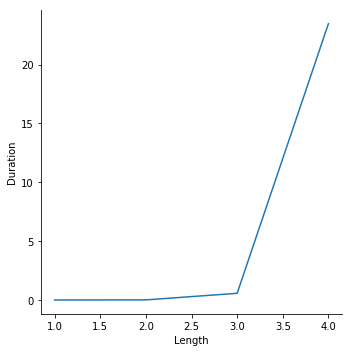

In [182]:
plot = sns.relplot(x='Length', y='Duration', kind='line', data=df) #plots the relationship of time and length